In [1]:
import numpy as np 
import pandas as pd ##pandas for data analaysis and data structure
import matplotlib.pyplot as plt #to help with plotting the data

#kera is the as
from keras.layers import Flatten, Dense, Dropout#flatten helps convert the data into 1 dimensional array, 
#which is a single feature vector that is then inputted into the fully connected layer
#in keras, the fully connected layer is called the dense layer
#we use dropout to prevent our model from being overfitted
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
#for generating images from our data set and reversing the images#i am planning to 
#write this code by myself
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [2]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2021-11-22 16:48:54--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2021-11-22 16:48:55--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb0f9bf4053bced1c8d80d137a9.dl.dropboxusercontent.com/cd/0/inline/BaexMNZNk5hN3FCpHgdvoqCzhre1US6Q5P-5Z4prr34SEuLp-IgUKJ5ZES1wicfOFsmbcnuIShlob9552YOPdLzetRl7ycTtRmE4K_qaxckH1JLaDf5CvnK8xkZZVubkKwSMQjEKr5m1nojaf4AAhGxu/file# [following]
--2021-11-22 16:48:55--  https://ucb0f9bf4053bced1c8d80d137a9.dl.dropboxusercontent.com/cd/0/inline/BaexMNZNk5hN3FCpHgdvoqCzhre1US6Q5P-5Z4prr34SEuLp-IgUKJ5ZES1wicfOFsmbcnuIShlob9552YOPdLze

In [3]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [4]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )
#our weights are False
#This function returns a Keras image classification model,
#optionally loaded with weights pre-trained on ImageNet.
#include_top = False we are not including the top layer
#need t specify the shape tuple which has a default res (224,224,3)

for layer in base_model.layers:
  ##to prevent pre training of the data
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)
#we will have 7 layers and here we activate the softmax layer

# creating our model.
model = Model(base_model.input, x)

17235968/17225924 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [6]:
#here ewe are preparing our data using data generator, but i am planning to write this part of code
#myself , such as reversing the image and converting it to black and white, converting arrays to images ??
##but here we are relying on image generator's built in libraries
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, #we want to specify zoom range because what if it gets to close and then 
     #we can only see the nose
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )
#the cycles going to run 32 times that is our batch size

train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


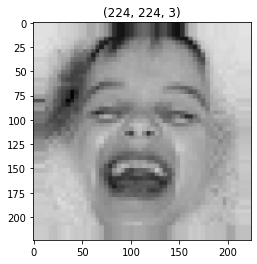

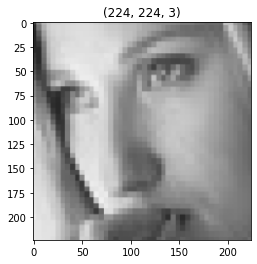

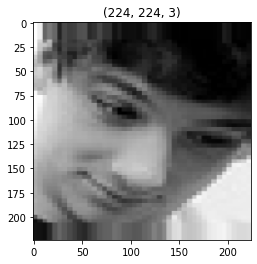

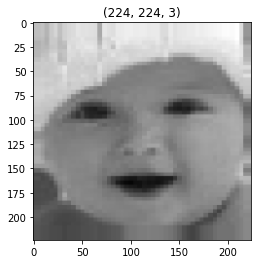

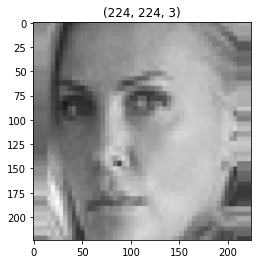

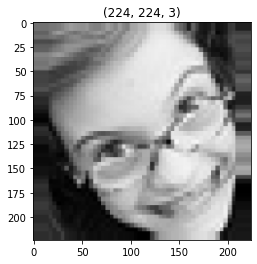

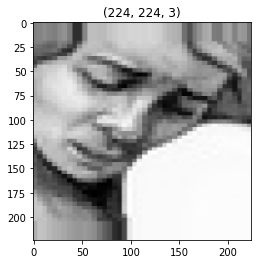

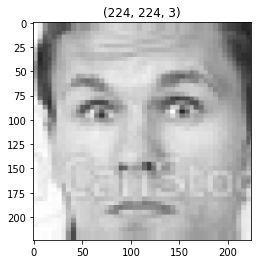

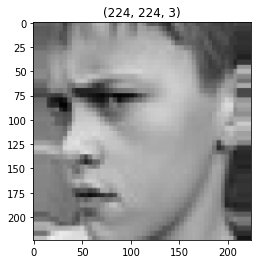

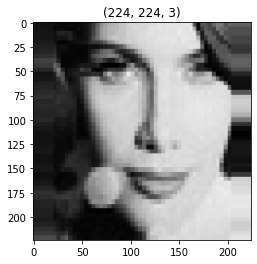

In [8]:
# to visualize the images in the traing data denerator 
# this is optional 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [9]:
## having early stopping and model check point 
# to avoid overfitting the data, as the model may overtrain and 
#pick up noise and fluctuations which will lead to overfitting the data,
#thats why we use Early stopping is a method that allows you to specify
# an arbitrary large number of training 
#epochs and stop training once the model performance stops improving on a hold out validation dataset.

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [10]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 16.9524 - accuracy: 0.2656
Epoch 00001: val_accuracy improved from -inf to 0.26172, saving model to best_model.h5
10/10 [==============================] - 36s 555ms/step - loss: 16.9524 - accuracy: 0.2656 - val_loss: 10.7941 - val_accuracy: 0.2617
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 11.3468 - accuracy: 0.2844
Epoch 00002: val_accuracy improved from 0.26172 to 0.30078, saving model to best_model.h5
10/10 [==============================] - 5s 487ms/step - loss: 11.3468 - accuracy: 0.2844 - val_loss: 7.9133 - val_accuracy: 0.3008
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 7.6167 - accuracy: 0.3031
Epoch 00003: val_accuracy improved from 0.30078 to 0.41016, saving model to best_model.h5
10/10 [==============================] - 5s 482ms/step - loss: 7.6167 - accuracy: 0.3031 - val_loss: 6.2316 - val_accuracy: 0.4102
Epoch 4/30
10/10 [==============================] - 

In [11]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

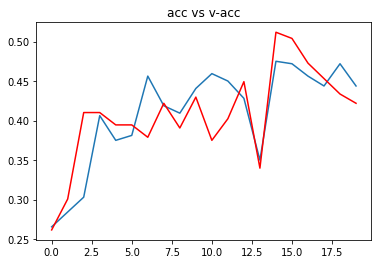

In [12]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

In [13]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [14]:
# path for the image to see if it predics correct class
# the path you can get by uploading image here and then clicking on copy path
#still pretty inaccurate because less data trained!
path = "/content/sad.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

FileNotFoundError: ignored

Citations for code sources:
Author: dhruvpandey
year: 2021
link: https://github.com/dhruvpandey662/Emotion-detection/blob/main/Emotion_Detection.ipynb

# New section